In [2]:
import pandas as pd
from scipy.io import mmread
import anndata as ad
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

In [3]:
adata = sc.read_10x_mtx('mappingResultsRUN2Solo.out/Gene/raw',
                        var_names = 'gene_symbols',
                        cache = True)

In [4]:
adata

AnnData object with n_obs × n_vars = 884736 × 3005
    var: 'gene_ids', 'feature_types'

In [ ]:
## CREATING WATERFALL PLOT
# Adds per-cell and per-gene summary stats
sc.pp.calculate_qc_metrics(adata, inplace=True)

#idk if we use total_counts (all UMIs) or total_genes (just genes)
umis = adata.obs["total_counts"].to_numpy() 
umis = umis[umis>0]
umis_sorted=np.sort(umis)
x_axis_umiCounts = np.unique(umis_sorted)
y_axis_cellCounts = umis_sorted.size - np.searchsorted(umis_sorted, x_axis_umiCounts, side="left")


# plot figure
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(
    np.log10(umi_cutoffs),
    np.log10(num_cells),
    linewidth=1
)

plt.xlabel("log10(UMI / cell)")
plt.ylabel("log10(number of cells ≥ cutoff)")
plt.title("UMI waterfall (barcode rank) plot")
plt.tight_layout()
plt.show()

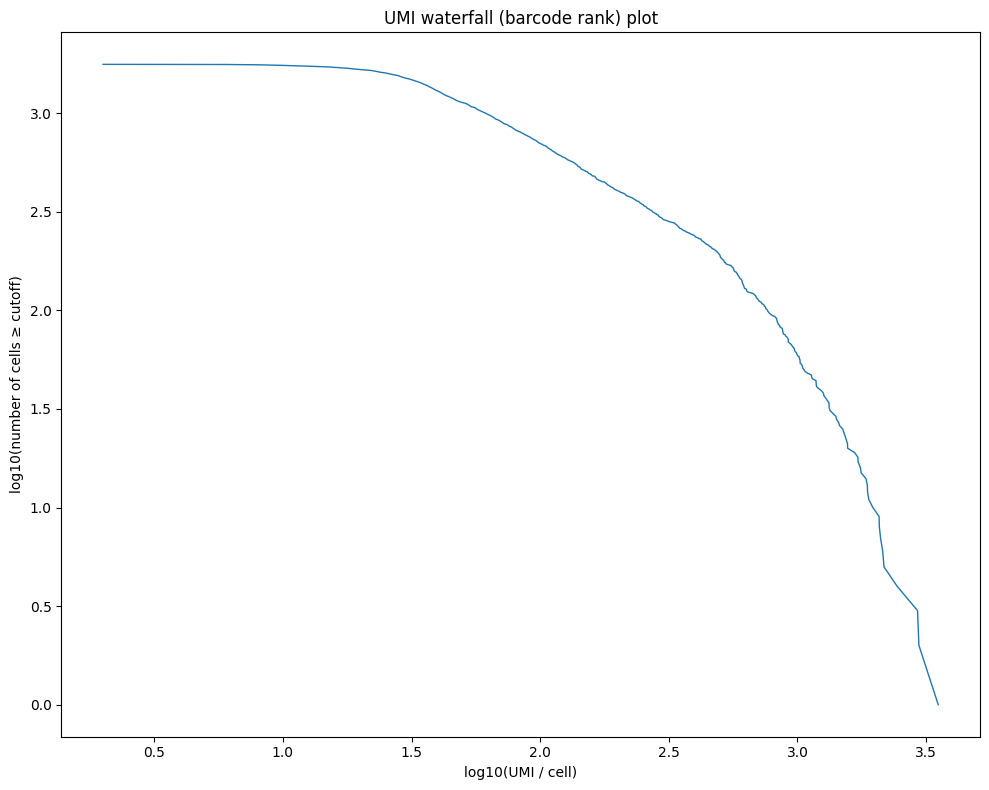

maximum curvature is -19870.044794208225 at 1324 UMIS, with coord. at 3.1218879222869873 on the graph.


In [21]:
## 1) Compute total UMI counts per barcode (cell) without calculate_qc_metrics
adata.obs["total_counts"] = np.asarray(adata.X.sum(axis=1)).ravel()

## 2) Build waterfall arrays: x = UMI cutoff, y = #cells with >= cutoff
umis = adata.obs["total_counts"].to_numpy()
umis = umis[umis > 0]                 # drop empty barcodes
umis_sorted = np.sort(umis)           # ascending

x_axis_umiCounts = np.unique(umis_sorted)  # the cutoff values (UMIs/cell)
y_axis_cellCounts = umis_sorted.size - np.searchsorted(
    umis_sorted, x_axis_umiCounts, side="left"
)

## 3) Plot log-log waterfall: log(numCells) vs log(UMI/cell)
x_log = np.log10(x_axis_umiCounts)
y_log = np.log10(y_axis_cellCounts)

plt.figure(figsize=(10, 8))
plt.plot(x_log, y_log, linewidth=1)
plt.xlabel("log10(UMI / cell)")
plt.ylabel("log10(number of cells ≥ cutoff)")
plt.title("UMI waterfall (barcode rank) plot")
plt.tight_layout()
plt.show()

# --- Maximum curvature on the log-log curve ---
# First derivative dy/dx (numerical)
dy_dx = np.gradient(y_log, x_log)

# Second derivative d²y/dx² (numerical)
d2y_dx2 = np.gradient(dy_dx, x_log)

# "Maximum curvature" as maximum magnitude of the 2nd derivative
max_curv_idx = int(np.argmax(np.abs(d2y_dx2)))
max_curvature = float(d2y_dx2[max_curv_idx])

umi_at_max_curv = int(x_axis_umiCounts[max_curv_idx])
xaxis_at_max_curv = float(x_log[max_curv_idx])

print(f"maximum curvature is {max_curvature} at {umi_at_max_curv} UMIS, with coord. at {xaxis_at_max_curv} on the graph.")


In [22]:
adata_filtered = adata[adata.obs["total_counts"] >= 1324]
adata_filtered.obs["total_counts"].min()

np.float32(1324.0)

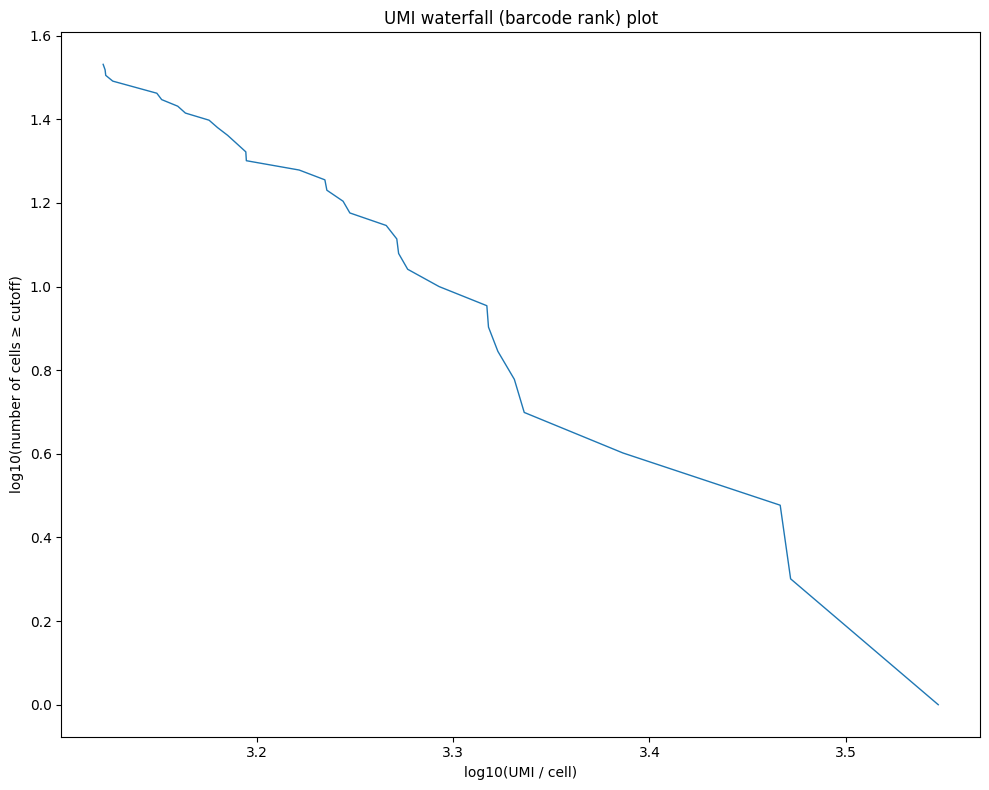

In [23]:
## 2) Build waterfall arrays: x = UMI cutoff, y = #cells with >= cutoff
umis = adata_filtered.obs["total_counts"].to_numpy()
umis = umis[umis > 0]                 # drop empty barcodes
umis_sorted = np.sort(umis)           # ascending

x_axis_umiCounts = np.unique(umis_sorted)  # the cutoff values (UMIs/cell)
y_axis_cellCounts = umis_sorted.size - np.searchsorted(
    umis_sorted, x_axis_umiCounts, side="left"
)

## 3) Plot log-log waterfall: log(numCells) vs log(UMI/cell)
x_log = np.log10(x_axis_umiCounts)
y_log = np.log10(y_axis_cellCounts)

plt.figure(figsize=(10, 8))
plt.plot(x_log, y_log, linewidth=1)
plt.xlabel("log10(UMI / cell)")
plt.ylabel("log10(number of cells ≥ cutoff)")
plt.title("UMI waterfall (barcode rank) plot")
plt.tight_layout()
plt.show()